In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
resized_dir = 'I:/RICE/rice_processed_dataset'

In [6]:
# Function to count images for each rice type
def get_image_counts(base_dir):
    data_counts = {}
    for rice_type in os.listdir(base_dir):
        type_path = os.path.join(base_dir, rice_type)
        if os.path.isdir(type_path):
            data_counts[rice_type] = len(os.listdir(type_path))
    return data_counts

image_counts = get_image_counts(resized_dir)
image_counts

{'Basmati': 2500,
 'Chinigura': 2500,
 'Jirashail': 2500,
 'Kataribhog': 2500,
 'Paijam': 2500}

In [8]:
data_counts_df = pd.DataFrame(image_counts.items(), columns=['Rice Type', 'Image Count'])
data_counts_df

,Rice Type,Image Count
0,Basmati,2500
1,Chinigura,2500
2,Jirashail,2500
3,Kataribhog,2500
4,Paijam,2500


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11196\4071136735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rice Type', y='Image Count', data=data_counts_df, palette='viridis')


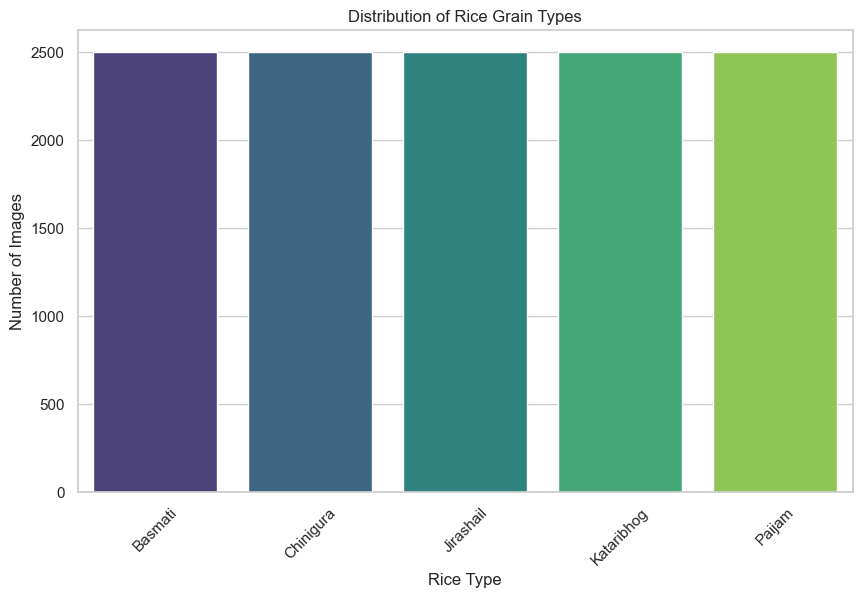

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Rice Type', y='Image Count', data=data_counts_df, palette='viridis')
plt.title('Distribution of Rice Grain Types')
plt.xticks(rotation=45)
plt.xlabel('Rice Type')
plt.ylabel('Number of Images')
plt.show()

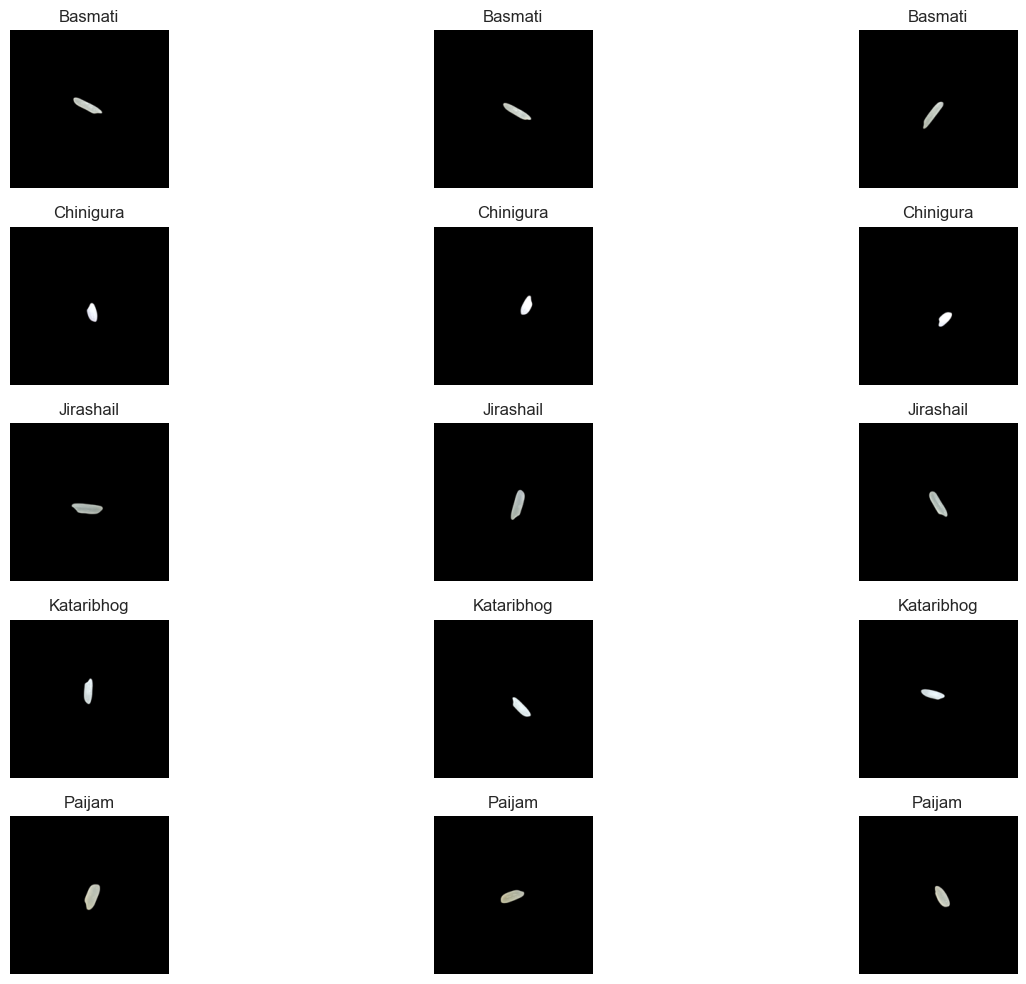

In [10]:
# Show some sample images from each rice type
def display_samples(base_dir, num_samples=3):
    plt.figure(figsize=(15, 10))
    
    rice_types = os.listdir(base_dir)
    
    for i, rice_type in enumerate(rice_types):
        type_path = os.path.join(base_dir, rice_type)
        sample_images = os.listdir(type_path)[:num_samples]
        
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(type_path, img_name)
            img = Image.open(img_path)
            plt.subplot(len(rice_types), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.title(rice_type)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display samples from each rice type
display_samples(resized_dir, num_samples=3)

In [11]:
# Checking for Missing Images
def check_missing_images(base_dir):
    missing_images = {}
    for rice_type in os.listdir(base_dir):
        type_path = os.path.join(base_dir, rice_type)
        if os.path.isdir(type_path):
            expected_count = 2500  # Expected number of images
            actual_count = len(os.listdir(type_path))
            if actual_count < expected_count:
                missing_images[rice_type] = expected_count - actual_count
    return missing_images

missing_images = check_missing_images(resized_dir)
print("Missing Images Report:")
print(missing_images)

Missing Images Report:
{}


In [12]:
# Analyze Image Sizes
def analyze_image_sizes(base_dir):
    sizes = []
    for rice_type in os.listdir(base_dir):
        type_path = os.path.join(base_dir, rice_type)
        if os.path.isdir(type_path):
            for img_name in os.listdir(type_path):
                img_path = os.path.join(type_path, img_name)
                img = Image.open(img_path)
                sizes.append(img.size)  # Collect image sizes (width, height)
    return sizes

sizes = analyze_image_sizes(resized_dir)
sizes_df = pd.DataFrame(sizes, columns=['Width', 'Height'])

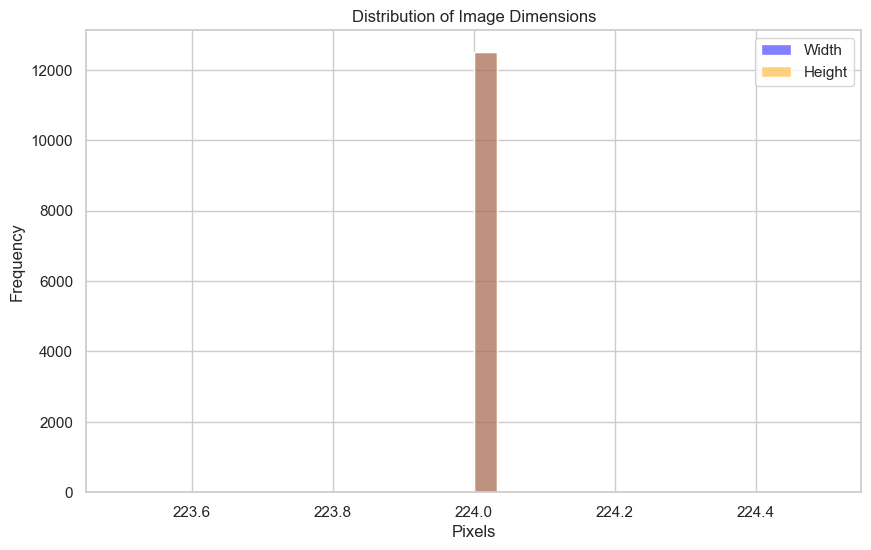

In [14]:
# Plotting Image Size Distribution
plt.figure(figsize=(10, 6))
sns.histplot(sizes_df['Width'], bins=30, color='blue', label='Width', alpha=0.5)
sns.histplot(sizes_df['Height'], bins=30, color='orange', label='Height', alpha=0.5)
plt.title('Distribution of Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()